<a href="https://colab.research.google.com/github/GMartinez02/Big-Data---43C8-Fall-2024/blob/main/demoMLPIRIS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Classificaiton Report: 
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

COnfusion matrix: 
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


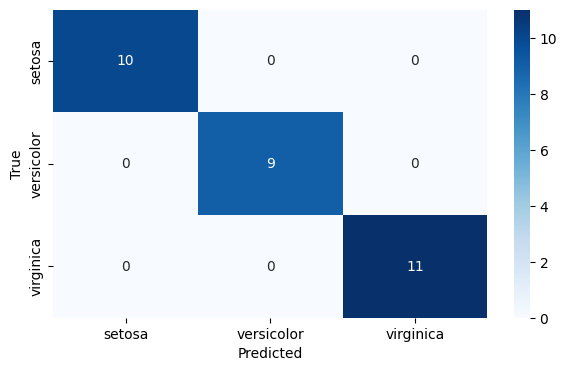

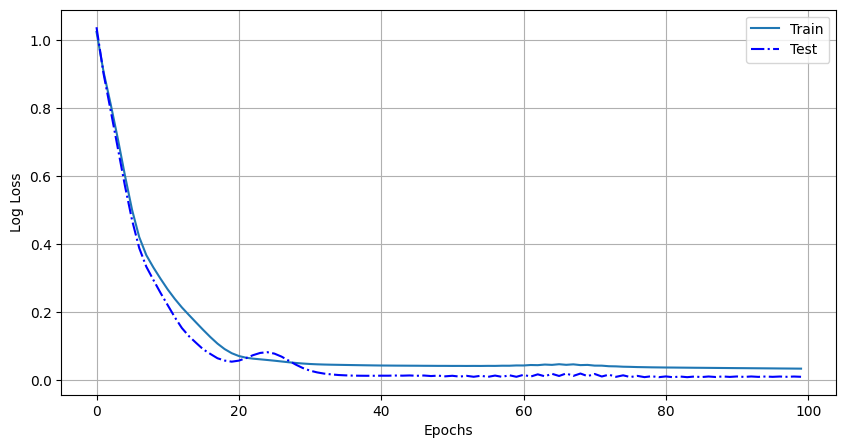

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pandas_datareader as web
import datetime as dt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import *
from sklearn.preprocessing import *
from sklearn.neural_network import MLPClassifier


np.random.seed=42 #baby strategy to increase reproducubilit

iris = load_iris()
X,y = iris.data,iris.target

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


clf = MLPClassifier(hidden_layer_sizes=(100,50,25),
                    max_iter=1,
                    solver = "sgd",
                    activation = "relu",
                    learning_rate_init = 0.1,
                    random_state = 42,
                    warm_start = True)
train_losses = []
test_losses = []


n_epoch = 100  #atleaset 100
for _ in range(n_epoch):
  clf.partial_fit(X_train_scaled,y_train,classes=np.unique(y))
  train_losses.append(log_loss(y_train,clf.predict_proba(X_train_scaled)))
  test_losses.append(log_loss(y_test,clf.predict_proba(X_test_scaled)))

y_pred = clf.predict(X_test_scaled)
report = classification_report(y_test,y_pred, target_names = iris.target_names)
print("Classificaiton Report: \n", report)

cm = confusion_matrix(y_test,y_pred)
print("COnfusion matrix: \n", cm)

plt.figure(figsize = (7,4))
sns.heatmap(cm, annot = True, fmt = "d", cmap = "Blues", xticklabels = iris.target_names, yticklabels = iris.target_names)
plt.xlabel("Predicted")
plt.ylabel("True")


fig = plt.figure(figsize = (10,5))
plt.plot(train_losses, label = "Train")
plt.plot(test_losses,"b-.", label = "Test")
plt.xlabel("Epochs")
plt.ylabel("Log Loss")
plt.legend()
plt.grid("on")
plt.show()